In [2]:
import numpy as np
import auxiliary_fun as a
from keras import utils
from keras.models import Sequential
from keras.layers import Dense, Activation
import random
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification as mk
from keras.metrics import Precision, Recall, AUC, MeanSquaredError
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation

# Perceptron

In [3]:
import time

All the following parameters can be changed to explore different casuistry

In [4]:
n_samples = 5000
n_features = 2
n_informative = 2
n_redundant = 0
n_classes = 2
n_clusters_per_class= 1
class_sep = [1.5]
epsilon = [0.8]
epochs = 100
weights=[0.7]

In [5]:
r = mk(n_samples = n_samples, 
            n_features= n_features, 
            n_informative= n_informative, 
            n_redundant= n_redundant,
            n_classes= n_classes,
            n_clusters_per_class= n_clusters_per_class,
            weights=weights,
            class_sep = class_sep[0])
data = r[0]
labels = r[1]

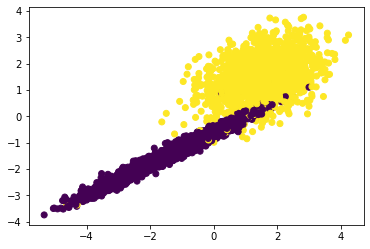

In [6]:
plt.scatter(data[:,0],data[:,1],c=labels)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)
start = time.time()
index = a.dominatingSet(X_train,y_train,epsilon=epsilon)
end = time.time()
print(abs(start-end))
rep = X_train[index]
labels_rep= y_train[index]
labels_train = to_categorical(y_train,num_classes=2)
labels_test = to_categorical(y_test,num_classes=2)
labels_rep_train = to_categorical(labels_rep,num_classes=2)
random_index = random.sample(range(len(X_train)),len(rep))
rand = data[random_index]
labels_rand = labels[random_index]
labels_rand_train = to_categorical(labels_rand,num_classes=2)
labels_cat = to_categorical(labels,num_classes=2)

5.294302225112915


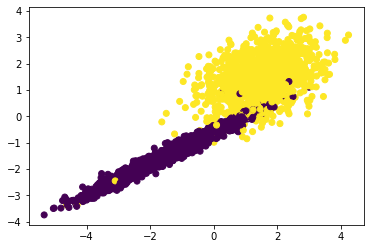

In [8]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)


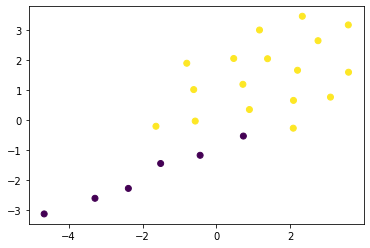

In [9]:
plt.scatter(rep[:,0],rep[:,1],c=labels_rep)
#plt.savefig('3_binary_class_dominating_data.png',dpi=500)

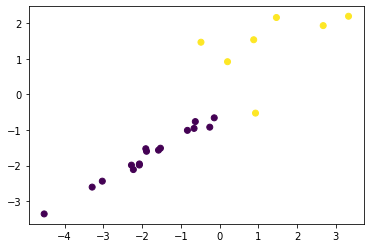

In [10]:
plt.scatter(rand[:,0],rand[:,1],c=labels_rand)
#plt.savefig('3_binary_class_random_data.png',dpi=500)

In [11]:
epochs = 20

In [12]:
l = []
for i in range(5):
    model1 = Sequential()
    model1.add(Dense(units=1, activation='sigmoid',input_shape=(n_features,)))
    model1.compile(optimizer="SGD", loss='MSE', metrics=['accuracy',Recall(), Precision(),AUC(),MeanSquaredError()])
    import time
    start = time.time()
    history1=model1.fit(X_train, y_train,batch_size=1, 
                                #batch_size=1,
                                #validation_split = val_split, 
                                epochs=epochs,
                                verbose=False)
    end = time.time()
    print(abs(start-end))
    l.append(model1.evaluate(X_test,y_test,verbose=0))
l = np.array(l)

19.807028770446777
20.273286819458008
19.30882716178894
19.50954246520996
20.1880624294281


In [24]:
np.mean(l[:,1])

0.9800000190734863

In [14]:
l2 = []
for i in range(5):
    model2 = Sequential()
    model2.add(Dense(units=1, activation='sigmoid',input_shape=(n_features,)))
    model2.compile(optimizer="SGD", loss='MSE', metrics=['accuracy',Recall(), Precision(),AUC(),MeanSquaredError()])
    import time
    start = time.time()
    history2=model2.fit(rep, labels_rep,batch_size=1, 
                                #batch_size=1,
                                #validation_split = val_split, 
                                epochs=epochs,
                                verbose=False)
    end = time.time()
    print(abs(start-end))
    l2.append(model2.evaluate(X_test,y_test,verbose=0))


0.6469447612762451
0.5223782062530518
0.5043606758117676
0.5138256549835205
0.6168727874755859


In [15]:
l2 = np.array(l2)

In [25]:
np.mean(l2[:,1])

0.7436000011861325

In [17]:
np.max(l2[:,1])

0.9729999899864197

In [18]:
l3 = []
for i in range(5):
    model3 = Sequential()
    model3.add(Dense(units=1, activation='sigmoid',input_shape=(n_features,)))
    model3.compile(optimizer="SGD", loss='MSE', metrics=['accuracy',Recall(), Precision(),AUC(),MeanSquaredError()])
    history3=model3.fit(rand, labels_rand, 
                        batch_size=1, 
                        epochs=epochs, 
                        verbose=False)
    l3.append(model3.evaluate(X_test,y_test,verbose=0))

In [19]:
l3 = np.array(l3)

In [26]:
np.mean(l3[:,1])

0.8101999998092652

In [21]:
len(rep)

23

In [22]:
len(rand)

23

# Multi-layer neural network

In [23]:
n_samples = 5000
n_features = 3
n_informative = 2
n_redundant = 0
n_classes = 2
n_clusters_per_class= 1
class_sep = [0.5]
epsilon = [0.3]
epochs = 20
weights=[0.4]

In [ ]:
r = mk(n_samples = n_samples, 
            n_features= n_features, 
            n_informative= n_informative, 
            n_redundant= n_redundant,
            n_classes= n_classes,
            n_clusters_per_class= n_clusters_per_class,
            weights=weights,
            class_sep = class_sep[0])
data = r[0]
labels = r[1]

In [ ]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(data[:,0], data[:,1], data[:,2], c = labels,cmap = "prism")
plt.savefig('5_binary_class_original_data.png',dpi=500)
pyplot.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)
start = time.time()
index = a.dominatingSet(X_train,y_train,epsilon=epsilon)
end = time.time()
print(abs(start-end))
rep = X_train[index]
labels_rep= y_train[index]
random_index = random.sample(range(len(X_train)),len(rep))
rand = data[random_index]
labels_rand = labels[random_index]


In [ ]:
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(X_train[:,0], X_train[:,1], X_train[:,2], c = y_train,cmap = "prism")
pyplot.show()


In [ ]:
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(rep[:,0], rep[:,1], rep[:,2], c = labels_rep,cmap = "prism")
plt.savefig('5_binary_class_dominating_data.png',dpi=500)
pyplot.show()


In [ ]:
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(rand[:,0], rand[:,1], rand[:,2], c = labels_rand,cmap = "prism")
plt.savefig('5_binary_class_rand_data.png',dpi=500)
pyplot.show()


In [ ]:
epochs = 

In [ ]:
l = []
for i in range(5):
    model1 = Sequential()
    model1.add(Dense(units=12, activation='relu', input_shape=(n_features,)))
    model1.add(Dense(units=6, activation='relu'))
    model1.add(Dense(units=1, activation='sigmoid'))
    model1.compile(optimizer="SGD", loss='MSE', metrics=['accuracy',Recall(), Precision(),AUC(),MeanSquaredError()])
    import time
    start = time.time()
    history1=model1.fit(X_train, y_train,batch_size=1, 
                                #batch_size=1,
                                #validation_split = val_split, 
                                epochs=epochs,
                                verbose=False)
    end = time.time()
    print(abs(start-end))
    l.append(model1.evaluate(X_test,y_test,verbose=0))
l = np.array(l)

In [ ]:
l = np.array(l)

In [ ]:
np.mean(l[:,5])

In [ ]:
l2 = []
for i in range(5):
    model2 = Sequential()
    model2.add(Dense(units=12, activation='relu', input_shape=(n_features,)))
    model2.add(Dense(units=6, activation='relu'))
    model2.add(Dense(units=1, activation='sigmoid'))
    model2.compile(optimizer="SGD", loss='MSE', metrics=['accuracy',Recall(), Precision(),AUC(),MeanSquaredError()])
    import time
    start = time.time()
    history2=model2.fit(rep, labels_rep,batch_size=1, 
                                #batch_size=1,
                                #validation_split = val_split, 
                                epochs=epochs,
                                verbose=False)
    end = time.time()
    print(abs(start-end))
    l2.append(model2.evaluate(X_test,y_test,verbose=0))
l2 = np.array(l2)

In [ ]:
np.mean(l2[:,5])

In [ ]:
l3 = []
for i in range(5):
    model3 = Sequential()
    model3.add(Dense(units=12, activation='relu', input_shape=(n_features,)))
    model3.add(Dense(units=6, activation='relu'))
    model3.add(Dense(units=1, activation='sigmoid'))
    model3.compile(optimizer="SGD", loss='MSE', metrics=['accuracy',Recall(), Precision(),AUC(),MeanSquaredError()])
    history3=model3.fit(rand, labels_rand, 
                        batch_size=1, 
                        epochs=epochs, 
                        verbose=False)
    l3.append(model3.evaluate(X_test,y_test,verbose=0))
l3 = np.array(l3)

In [ ]:
np.mean(l3[:,5])

In [ ]:
len(data)

In [ ]:
len(rep)

In [ ]:
plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])
plt.legend(['original', 'Representative','Random'], loc='upper left')